In [1]:
# Importing libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

In [2]:
# Importing dataset

bnk_dst = pd.read_csv('bank_churn.csv')

In [3]:
# Random sample of Dataset

bnk_dst.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
bnk_dst.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
# Check if customer age is less than 18

(bnk_dst['Age'] < 18).sum()

0

In [6]:
# Check if there exists any duplicate data

bnk_dst.duplicated().sum()

0

Percntage of customers that have left the bank against active customers

In [7]:
# Percntage of customers that have left the bank

total_customers = len(bnk_dst)
total_customers_left = (bnk_dst['Exited'] == 1).sum()

per_left = (total_customers_left/total_customers) * 100
per_active = 100 - per_left


print("Percentage of active customers: ", per_active, "Percentage of churn customers: ", per_left)

Percentage of active customers:  79.63 Percentage of churn customers:  20.369999999999997


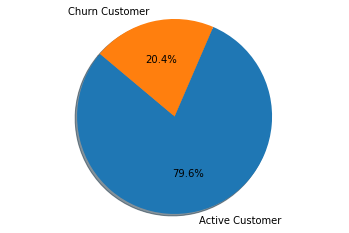

In [8]:
labels = ['Active Customer', 'Churn Customer']
sizes = [per_active, per_left]
# Plot
plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [9]:
bnk_dst.sample(n=20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2105,2106,15615096,Costa,492,France,Female,31,7,0.00,2,1,1,49463.44,0
3329,3330,15684925,Vicars,850,France,Female,43,3,0.00,2,0,0,2465.80,0
6953,6954,15579109,Napolitano,574,Germany,Male,35,5,163856.76,1,1,1,15118.20,0
4797,4798,15666173,Chidumaga,793,Germany,Female,32,1,96408.98,1,1,1,138191.81,0
9157,9158,15778915,Harris,737,France,Female,32,7,128551.36,2,0,1,189402.71,0
5655,5656,15573171,Liao,695,Spain,Male,63,1,146202.93,1,1,1,126688.83,1
7110,7111,15681509,McKay,679,Spain,Female,28,9,0.00,2,0,1,61761.77,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5613,5614,15689412,Christie,604,France,Female,32,7,127849.38,1,1,0,15798.70,0
8535,8536,15754940,Descoteaux,597,Spain,Male,43,2,85162.26,1,0,1,5104.08,1


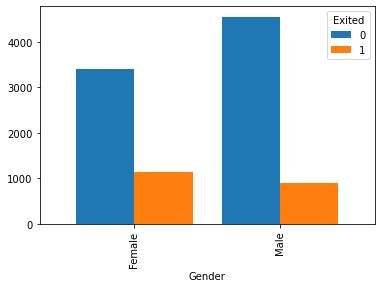

In [10]:
survival_vs_sex = bnk_dst.groupby(['Exited','Gender']).size().reset_index().pivot(index='Gender', columns='Exited', values=0)
survival_vs_sex.plot(kind='bar', stacked=False, width=0.8)
plt.show()

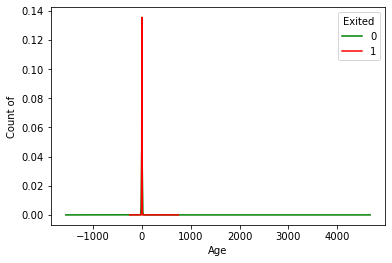

In [11]:
plot_data = bnk_dst.groupby(['Exited', 'Balance']).size().reset_index().pivot(index='Balance', columns='Exited', values=0)


plot_data.plot(kind='density', stacked=True, color=['green', 'red','yellow'])
plt.ylabel('Count of')
plt.xlabel('Age')
plt.show()

## Age distribution of the Active and Churn customers

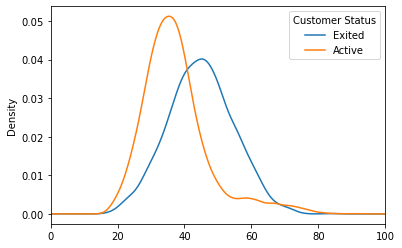

In [12]:
bnk_dst[bnk_dst['Exited'] == 1]['Age'].plot(kind = 'density', label = 'Exited')
bnk_dst[bnk_dst['Exited'] == 0]['Age'].plot(kind = 'density', label = 'Active')


plt.legend(title = 'Customer Status')
plt.xlim(0,100)
plt.show()

## Remove unimportant columns

In [13]:
bnk_dst = bnk_dst.drop(['RowNumber', 'CustomerId', 'Surname' ], axis=1)

## Indexing Dataset

In [14]:
X = bnk_dst.iloc[:, 1:]
y = bnk_dst.iloc[:, 10]
y


0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

## Spliting the data set

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7500, 10)
(2500, 10)
(7500,)
(2500,)


In [17]:
X_train.head()

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
651,France,Male,52,7,0.00,1,1,1,14781.12,0
6560,France,Female,32,1,0.00,2,1,0,9902.39,0
8974,Spain,Female,43,1,0.00,2,1,0,31962.77,0
2348,France,Male,45,3,129209.48,1,0,0,60151.77,0
5670,France,Male,32,8,0.00,2,1,0,67364.42,0


## Train Dataset Scaling

In [18]:
X_train[['Age', 'Balance']][:5]

,Age,Balance
651,52,0.00
6560,32,0.00
8974,43,0.00
2348,45,129209.48
5670,32,0.00


In [19]:
pd.options.mode.chained_assignment = None  # default='warn'
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['Age', 'Balance']] = scaler.fit_transform(X_train[['Age', 'Balance']])
X_test[['Age', 'Balance']] = scaler.transform(X_test[['Age', 'Balance']])

In [20]:
X_train[['Age', 'Balance']][:5]

,Age,Balance
651,1.256181,-1.228601
6560,-0.659527,-1.228601
8974,0.394112,-1.228601
2348,0.585683,0.844319
5670,-0.659527,-1.228601


In [21]:
X_train.head()

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
651,France,Male,1.256181,7,-1.228601,1,1,1,14781.12,0
6560,France,Female,-0.659527,1,-1.228601,2,1,0,9902.39,0
8974,Spain,Female,0.394112,1,-1.228601,2,1,0,31962.77,0
2348,France,Male,0.585683,3,0.844319,1,0,0,60151.77,0
5670,France,Male,-0.659527,8,-1.228601,2,1,0,67364.42,0
